In [1]:
from pyskl.models import build_model
from mmcv import Config
from mmcv.runner.checkpoint import load_checkpoint

In [2]:
base = '../work_dirs/aagcn/aagcn_pyskl_ntu60_xsub_3dkp/j_0.01_random35_conv'
config = f'{base}/j.py'
checkpoint_file = f'{base}/best_top1_acc_epoch_16.pth'

In [3]:
cfg = Config.fromfile(config)
model = build_model(cfg.model)
load_checkpoint(model, checkpoint_file)

load checkpoint from local path: ../work_dirs/aagcn/aagcn_pyskl_ntu60_xsub_3dkp/j_0.01_random35_conv/best_top1_acc_epoch_16.pth


{'meta': {'env_info': 'sys.platform: linux\nPython: 3.7.11 (default, Jul 27 2021, 14:32:16) [GCC 7.5.0]\nCUDA available: True\nGPU 0: NVIDIA A100-SXM4-40GB\nCUDA_HOME: None\nGCC: gcc (GCC) 4.8.5 20150623 (Red Hat 4.8.5-44)\nPyTorch: 1.11.0\nPyTorch compiling details: PyTorch built with:\n  - GCC 7.3\n  - C++ Version: 201402\n  - Intel(R) oneAPI Math Kernel Library Version 2021.4-Product Build 20210904 for Intel(R) 64 architecture applications\n  - Intel(R) MKL-DNN v2.5.2 (Git Hash a9302535553c73243c632ad3c4c80beec3d19a1e)\n  - OpenMP 201511 (a.k.a. OpenMP 4.5)\n  - LAPACK is enabled (usually provided by MKL)\n  - NNPACK is enabled\n  - CPU capability usage: AVX2\n  - CUDA Runtime 11.3\n  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_80,code=sm_80;-gencode;arch=compute_86

In [4]:
model

RecognizerGCN(
  (backbone): AAGCN(
    (data_bn): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (gcn): ModuleList(
      (0): AAGCNBlock(
        (gcn): unit_aagcnconv(
          (conv_d): ModuleList(
            (0): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
            (1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
            (2): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
            (3): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
            (4): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
            (5): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
            (6): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
            (7): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
          )
          (conv_a): ModuleList(
            (0): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1))
            (1): Conv2d(3, 16, kernel_size=(1, 1), stride=(1, 1))
            (2): Conv2d(3, 16, kernel_size=(1, 1), stri

In [5]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())
count_parameters(model)

5501306

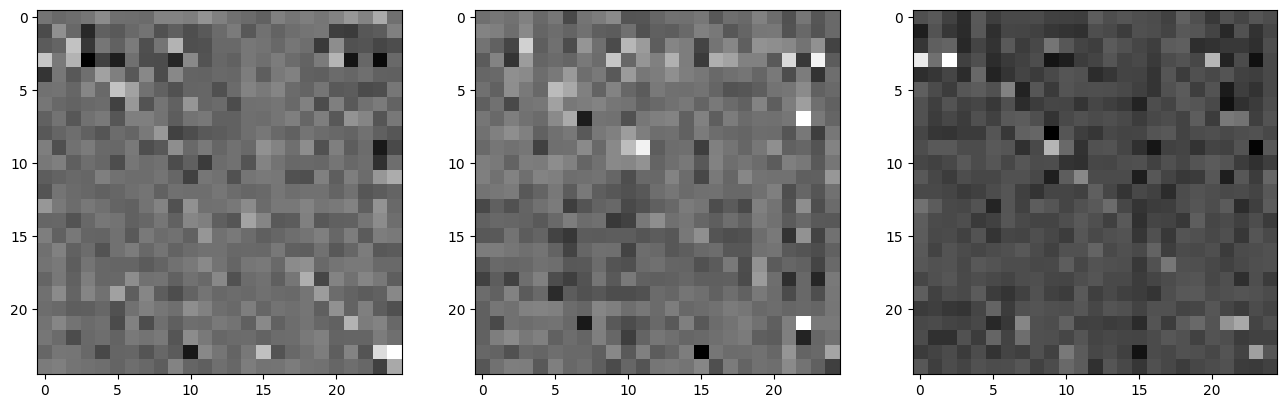

In [6]:
import matplotlib.pyplot as plt
import numpy as np

layer = 0

plt.figure(figsize=(16, 9))

for i in range(3):
    data = model.backbone.gcn[layer].gcn.A[i].detach().numpy()
    # Create a heatmap
    plt.subplot(1, 3, i + 1)
    plt.imshow(data, cmap='gray', interpolation='nearest')

# Show the plot
plt.show()

In [7]:
differences = np.empty(shape = (3, 3))
layer = 0
for i in range(3):
    for j in range(3):
        A1 = model.backbone.gcn[layer].gcn.A[i].detach().numpy()
        A2 = model.backbone.gcn[layer].gcn.A[j].detach().numpy()
        differences[i][j] = np.linalg.norm(A1 - A2)
differences

array([[0.        , 2.34563303, 1.73206043],
       [2.34563303, 0.        , 2.1932199 ],
       [1.73206043, 2.1932199 , 0.        ]])

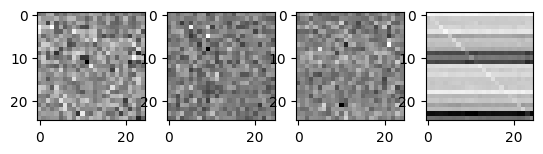

In [8]:
import matplotlib.pyplot as plt
import numpy as np


layers = [3, 5, 7, 9]
a = 3

for i in range(len(layers)):
    data = model.backbone.gcn[layers[i]].gcn.A[a].detach().numpy()
    # Create a heatmap
    plt.subplot(1, len(layers), i + 1)
    plt.imshow(data, cmap='gray', interpolation='nearest')
# Show the plot
plt.show()
